Problem Statement:
HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.

Aim:Predicting Whether the Employee gets Promoted or Not Promoted Based on certain parameters

In [24]:
# Importing the necessary tools for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [25]:
import io
%cd "C:\Mani-DS\Capstone project\Hr_Analytics"

C:\Mani-DS\Capstone project\Hr_Analytics


In [39]:
# loading the file
hr_train=pd.read_csv("train.csv")
hr_test=pd.read_csv("test.csv")

In [40]:
print(hr_test.shape)
print(hr_train.shape)

(23490, 13)
(54808, 14)


In [41]:
print(hr_test.info())
print(hr_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 ent

In [42]:
hr_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [43]:
hr_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [44]:
hr_train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [45]:
hr_test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


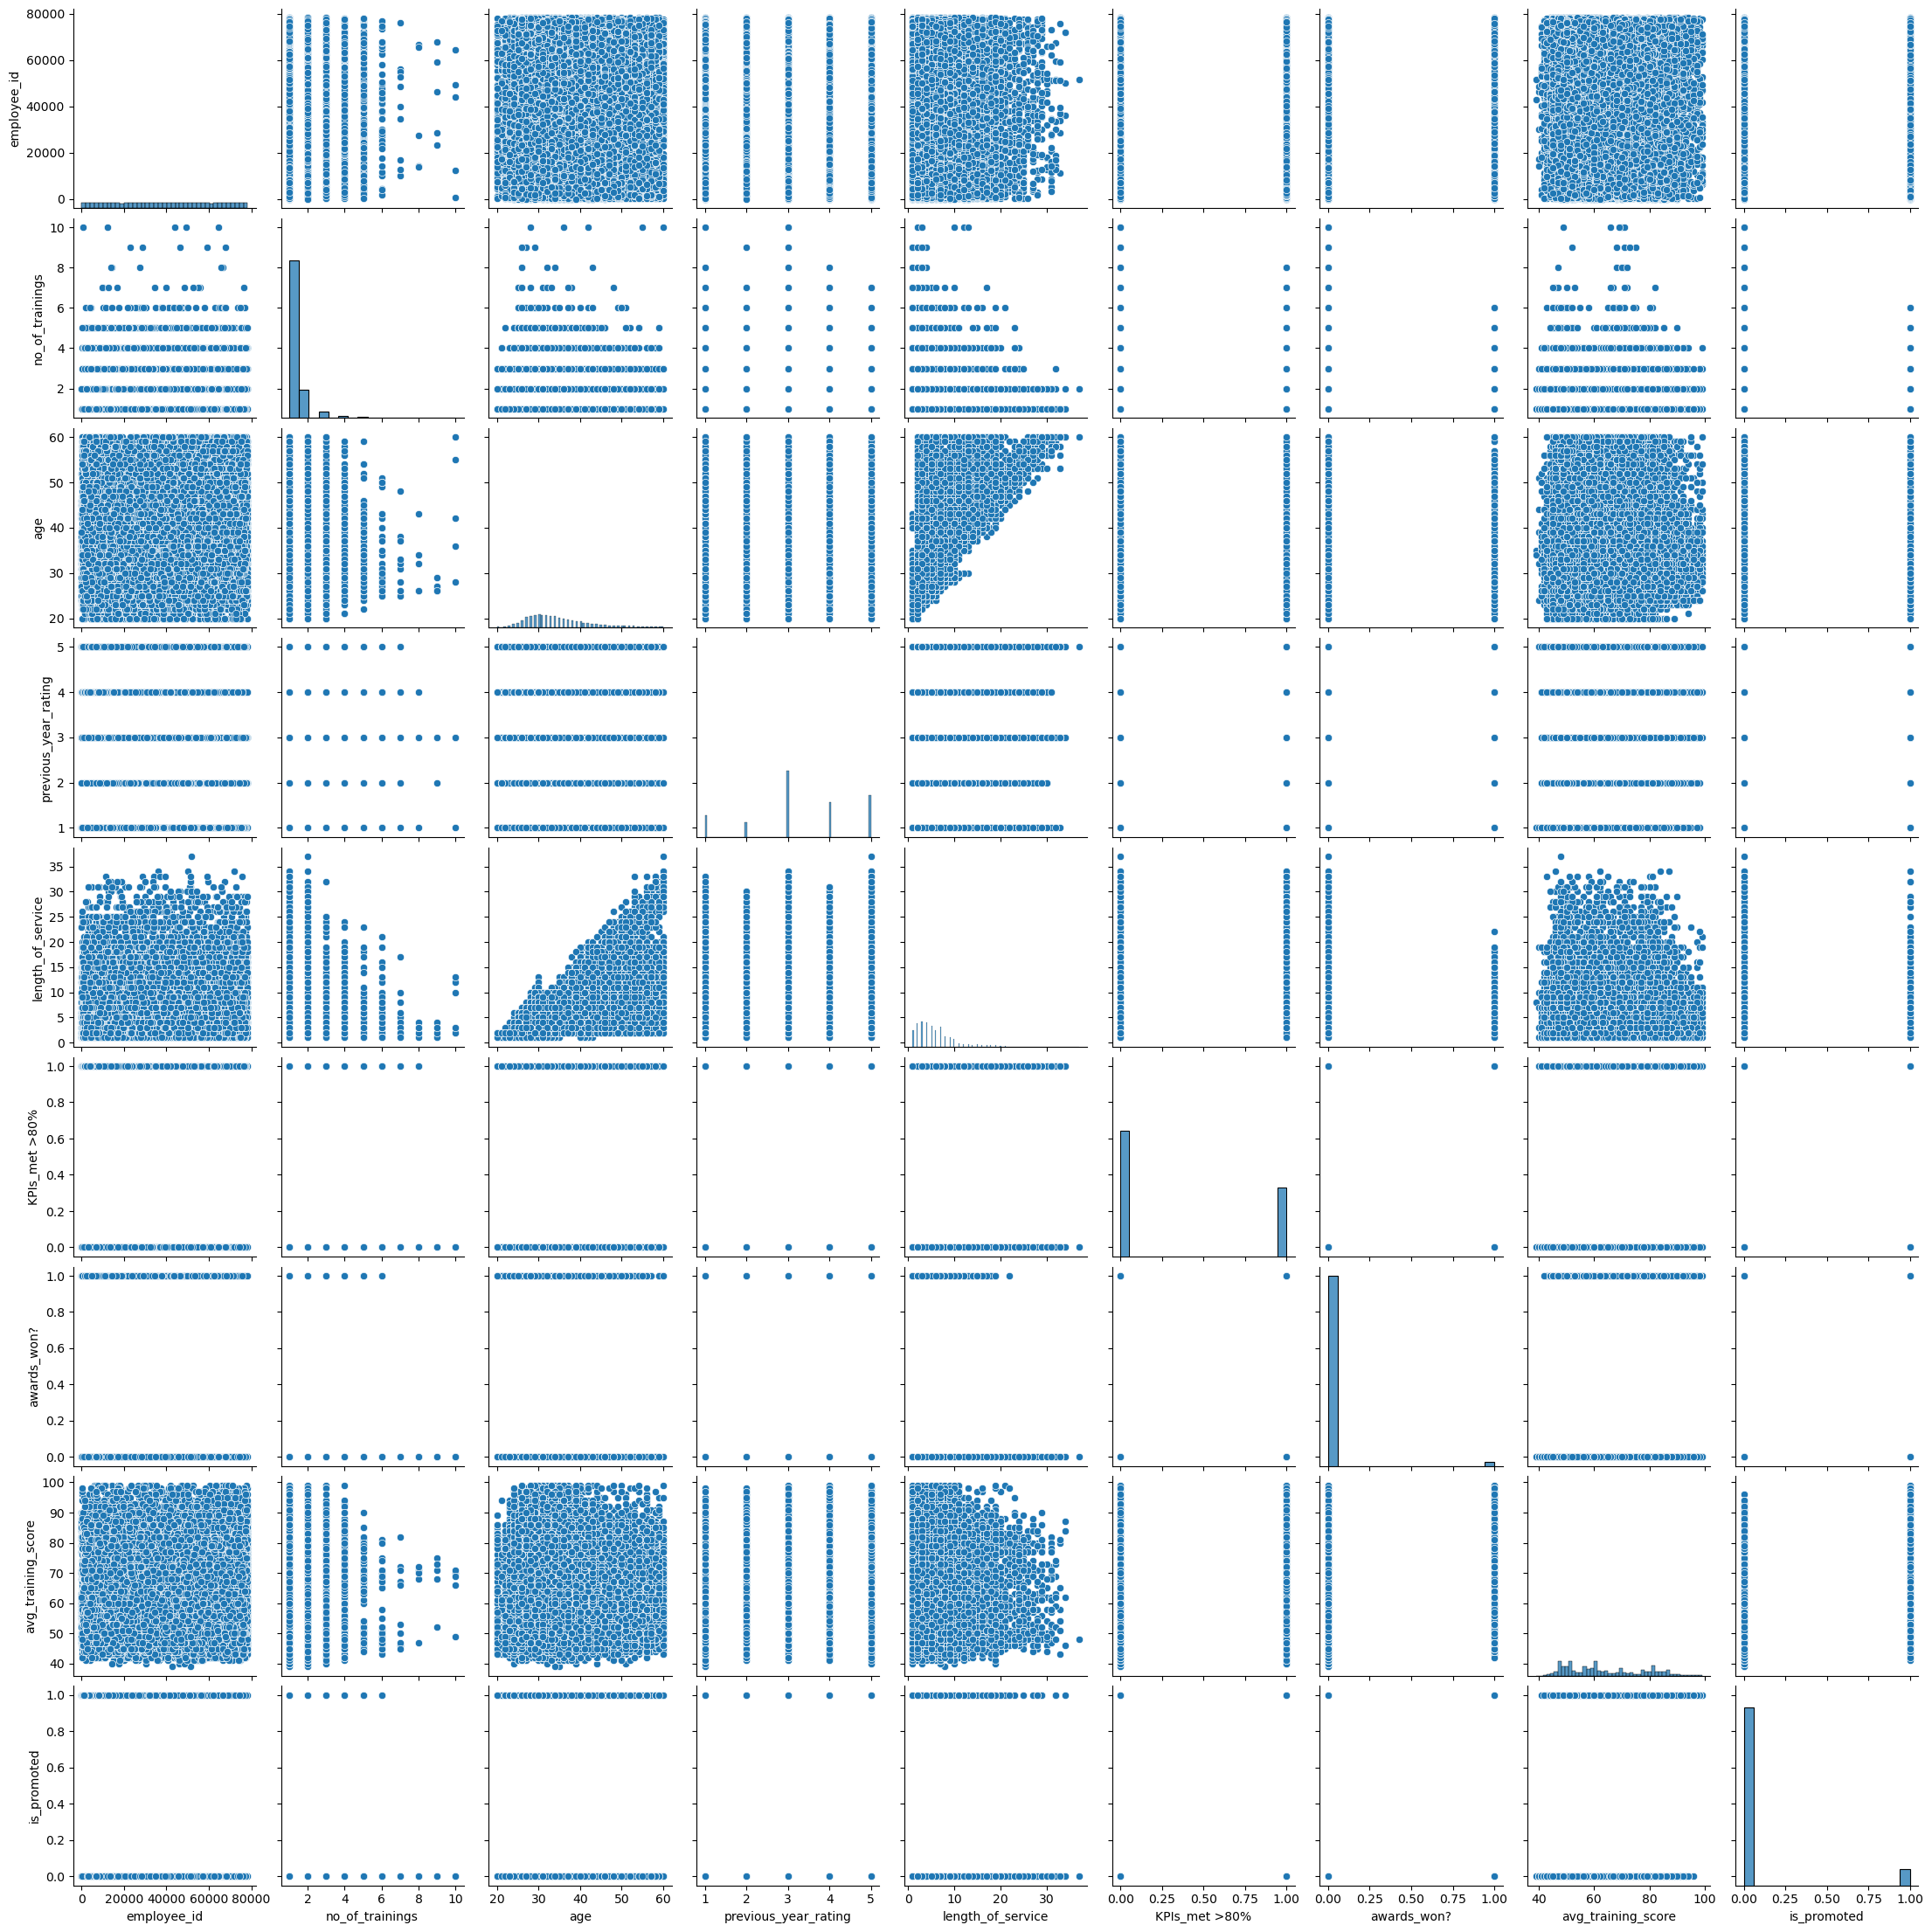

In [57]:
sns.pairplot(hr_train)

In [59]:
#Various Departments handling by HR
dep_values=hr_train.department.value_counts().values
dep_names=hr_train.department.value_counts().index

([<matplotlib.patches.Wedge at 0x20da71a70a0>,
 [Text(0.6261160405772292, 0.9044217510276351, 'Sales & Marketing'),
  Text(-0.9316361186469959, 0.5848539496595375, 'Operations'),
  Text(-0.9658531889033508, -0.5264291191463751, 'Technology'),
  Text(-0.27583991022951315, -1.0648532029930577, 'Procurement'),
  Text(0.4907636247648215, -0.9844547041929831, 'Analytics'),
  Text(0.8715486604487777, -0.6711206541821981, 'Finance'),
  Text(1.0246681229170411, -0.4000690413886927, 'HR'),
  Text(1.0833747810569074, -0.19052318433696752, 'Legal'),
  Text(1.098197033249563, -0.06295455632326008, 'R&D')],
 [Text(0.3415178403148523, 0.49332095510598273, '30.73%'),
  Text(-0.508165155625634, 0.3190112452688386, '20.71%'),
  Text(-0.5268290121291004, -0.28714315589802275, '13.02%'),
  Text(-0.1504581328524617, -0.580829019814395, '13.02%'),
  Text(0.26768924987172077, -0.5369752931961725, '9.76%'),
  Text(0.4753901784266059, -0.36606581137210803, '4.63%'),
  Text(0.558909885227477, -0.21821947712110

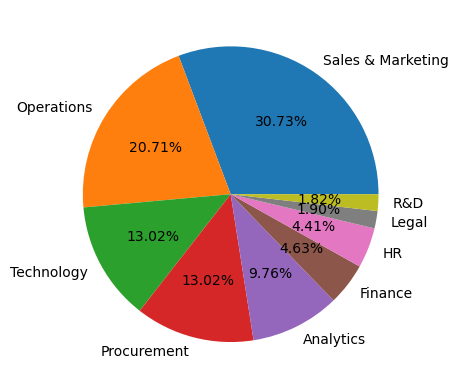

In [60]:
plt.pie(dep_values,labels=dep_names,autopct='%1.2f%%')

* We can see that maximum number of people working in Sales & Marketing, Operations departments and least in R&D departments.

array([[<AxesSubplot: title={'center': 'employee_id'}>,
        <AxesSubplot: title={'center': 'no_of_trainings'}>,
        <AxesSubplot: title={'center': 'age'}>],
       [<AxesSubplot: title={'center': 'previous_year_rating'}>,
        <AxesSubplot: title={'center': 'length_of_service'}>,
        <AxesSubplot: title={'center': 'KPIs_met >80%'}>],
       [<AxesSubplot: title={'center': 'awards_won?'}>,
        <AxesSubplot: title={'center': 'avg_training_score'}>,
        <AxesSubplot: title={'center': 'is_promoted'}>]], dtype=object)

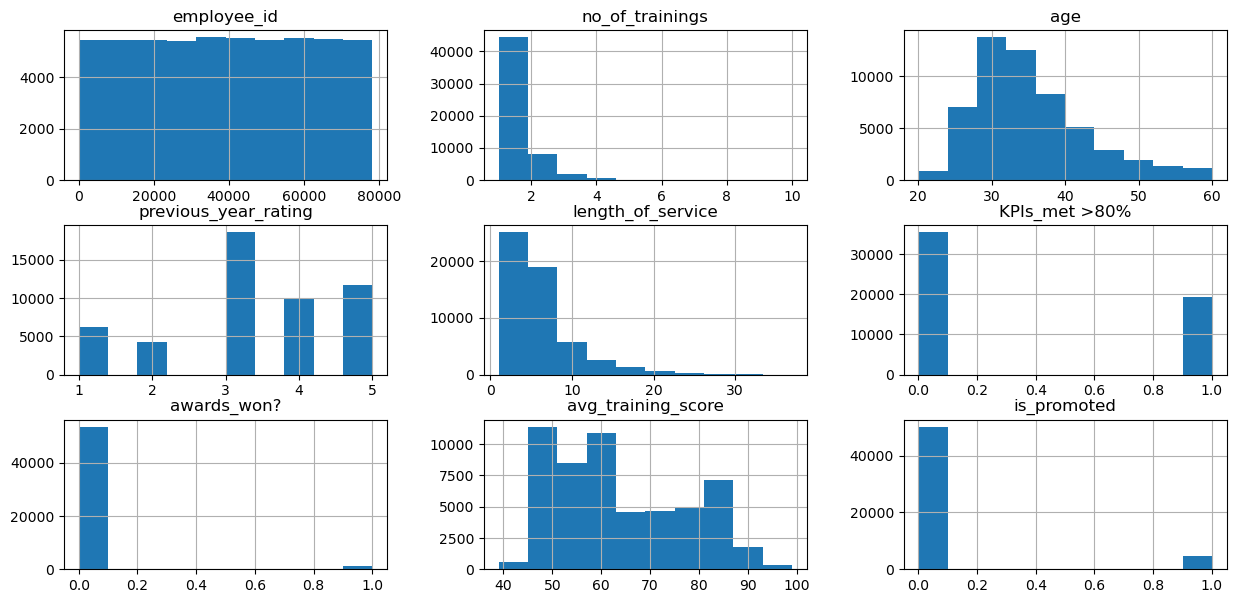

In [61]:
hr_train.hist(figsize=(15,7))

In [62]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

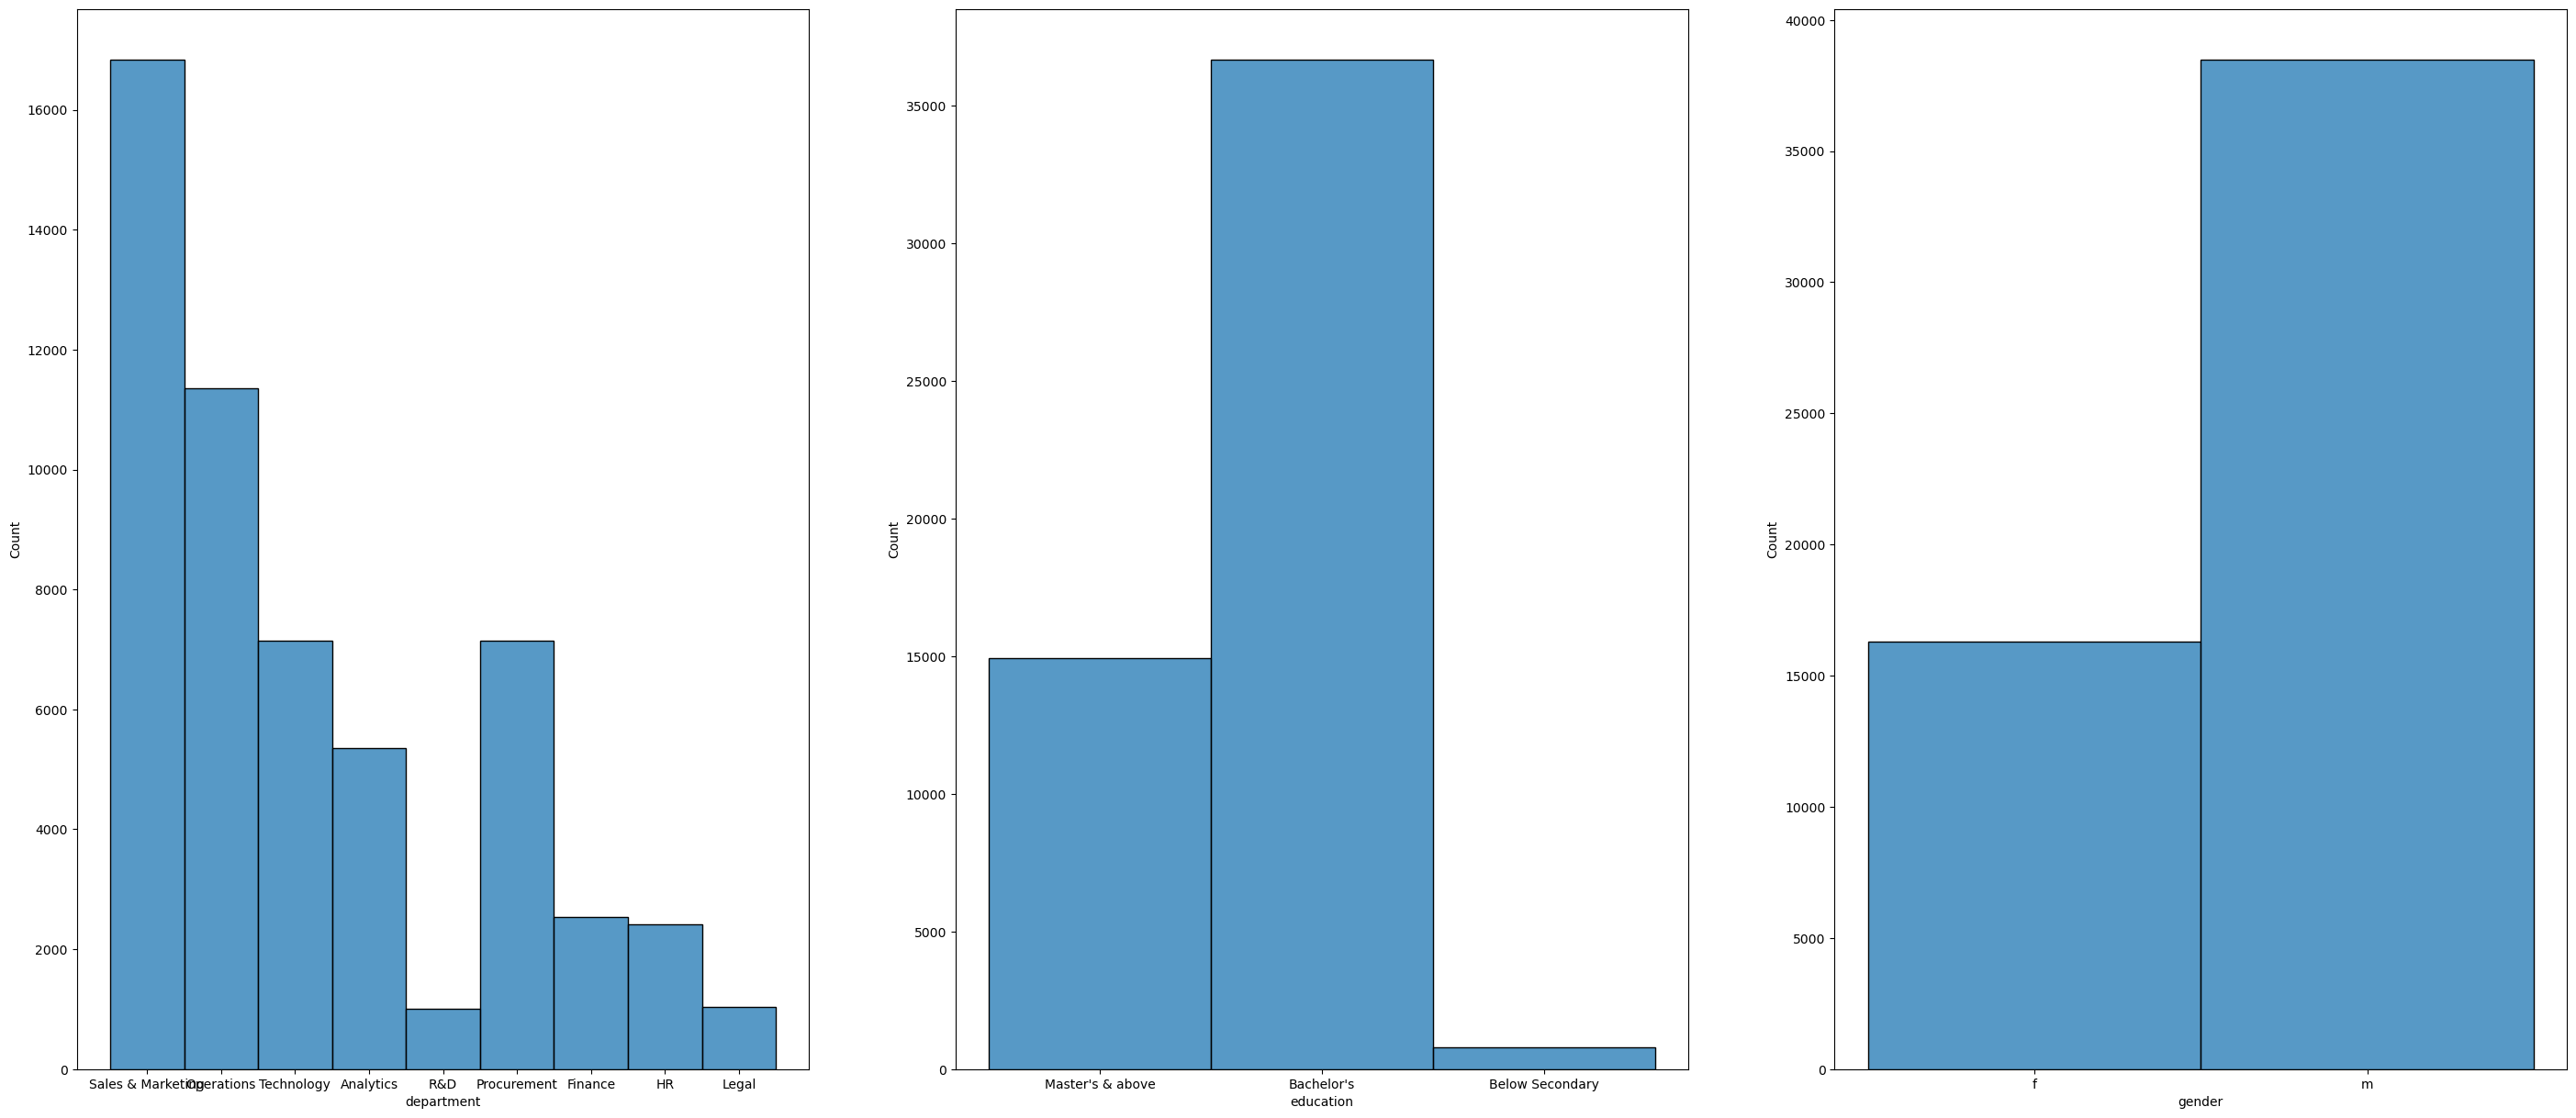

In [63]:
categorical=hr_train[['department', 'education', 'gender']]
fig , ax=plt.subplots(nrows = 1, ncols = 3, figsize=(35,15))
for variable, subplot in zip(categorical, ax.flatten()):
        sns.histplot(hr_train[variable], ax = subplot)
plt.show()

Observations:
    * From above plots, we can see that maximum number of employees are working in sales & marketing & followed by operations
    * Most of the employees Having bachelor's degree.
    * most of them are male employees.

<AxesSubplot: xlabel='awards_won?', ylabel='previous_year_rating'>

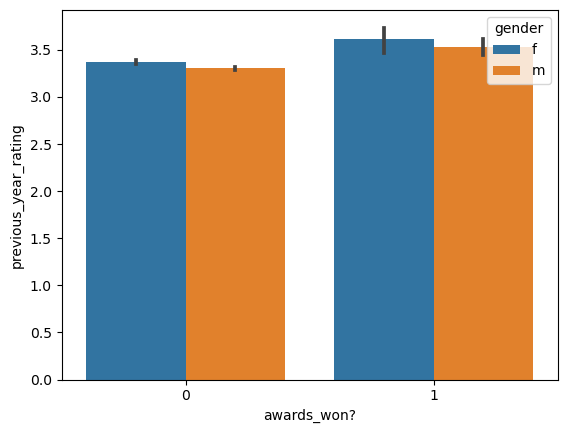

In [64]:
sns.barplot(x=hr_train['awards_won?'],y=hr_train['previous_year_rating'],hue=hr_train['gender'])

From above graph we can see that half of the employess who have excellent previous year rating (above>3.0) won the awards and most of them were females.

([<matplotlib.patches.Wedge at 0x20da7e4b490>,
 [Text(-1.0608579614755376, 0.2908270715974823, '0'),
  Text(1.0608579750901341, -0.29082702193513676, '1')],
 [Text(-0.578649797168475, 0.15863294814408124, '91.48%'),
  Text(0.5786498045946186, -0.15863292105552915, '8.52%')])

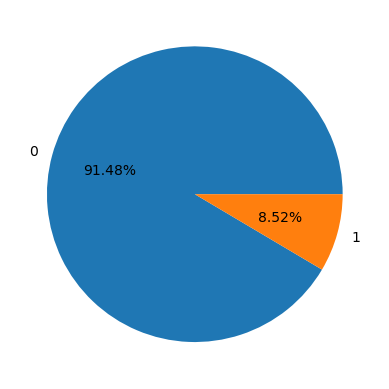

In [65]:
labels = hr_train['is_promoted'].value_counts().index
values = hr_train['is_promoted'].value_counts().values

plt.pie(values,labels=labels,autopct='%1.2f%%')

* From above plot,we can see that only 8% employees are promoted

<AxesSubplot: ylabel='Density'>

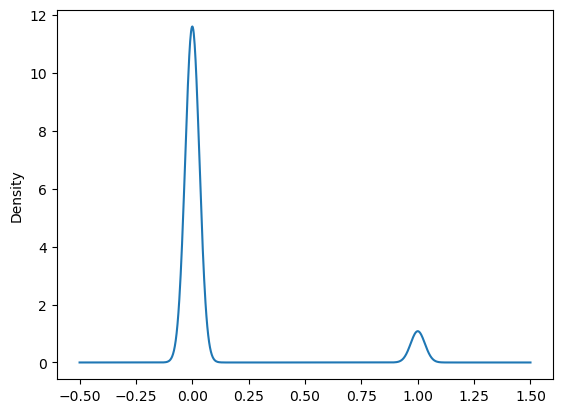

In [66]:
hr_train['is_promoted'].plot(kind='density')

In [46]:
# Adding dependant variable temporarly to test data
hr_test["is_promoted"]="test"

In [47]:
# Combining the test data & train data 
combine_hr=pd.concat([hr_test,hr_train],axis=0)

In [48]:
combine_hr.shape

(78298, 14)

In [49]:
# Finding the Missing values
combine_hr.isnull().sum().sort_values(ascending=False)

previous_year_rating    5936
education               3443
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [50]:
combine_hr.previous_year_rating.value_counts(dropna=False)

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [51]:
combine_hr.previous_year_rating=combine_hr.previous_year_rating.fillna(combine_hr.previous_year_rating.median())

In [52]:
combine_hr.education.value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [53]:
combine_hr.education=combine_hr.education.fillna(combine_hr.education.value_counts().idxmax())

In [54]:
combine_hr.isnull().sum().sort_values(ascending=False)

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Hypothesis Testing

In [80]:
#Test Null average education on 'is_promoted' 0/1 equal
#Null- there is no significant differnce in both the variables
#Alt- there is significant differnce in both the variables
hr_train['is_promoted'].groupby(hr_train.education).mean()

education
Bachelor's          0.082031
Below Secondary     0.083230
Master's & above    0.098559
Name: is_promoted, dtype: float64

In [81]:
# Split Data
Bachelors=hr_train[hr_train.education=="Bachelor's"]
below_sec=hr_train[hr_train.education=="Below Secondary"]
masters_above=hr_train[hr_train.education=="Master's & above"]

In [82]:
from scipy.stats import f_oneway

In [83]:
f_oneway(Bachelors['is_promoted'],below_sec['is_promoted'],masters_above['is_promoted'])
#Since p-value is 1.0659027130881227e-08 is less than 0.05, reject null

F_onewayResult(statistic=18.36329148573179, pvalue=1.0659027130881227e-08)

In [84]:
#Test Null average gender on 'is_promoted' 0/1 equal
#Null- there is no significant differnce in both the variables
#Alt- there is significant differnce in both the variables
hr_train['is_promoted'].groupby(hr_train.gender).mean()

gender
f    0.089934
m    0.083151
Name: is_promoted, dtype: float64

In [85]:
hr_train['is_promoted'].groupby(hr_train.gender).var()

gender
f    0.081851
m    0.076239
Name: is_promoted, dtype: float64

In [86]:
#Split data
f=hr_train[hr_train.gender=='f']
m=hr_train[hr_train.gender=='m']

In [87]:
from scipy.stats import ttest_ind

In [88]:
ttest_ind(f.is_promoted,m.is_promoted,equal_var=False)
#since p_value 0.01035868146324101 is less than 0.05 , reject null

Ttest_indResult(statistic=2.563783306069941, pvalue=0.01035868146324101)

In [89]:
# TEST NULL NO ASSOCIATION BETWEEN DEPARTMENT AND IS PROMOTED
pd.crosstab(hr_train.department,hr_train.is_promoted)

is_promoted,0,1
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


In [90]:
from scipy.stats import chi2_contingency

In [91]:
chi2_contingency(pd.crosstab(hr_train.department,hr_train.is_promoted))
# since p value 9.882497107474632e-29 less than 0.05, reject null

(151.4263551632387,
 9.882497107474632e-29,
 8,
 array([[ 4896.1699022 ,   455.8300978 ],
        [ 2320.00875785,   215.99124215],
        [ 2212.05882353,   205.94117647],
        [  950.50831995,    88.49168005],
        [10381.49029339,   966.50970661],
        [ 6530.05619618,   607.94380382],
        [  913.91512188,    85.08487812],
        [15405.73638885,  1434.26361115],
        [ 6530.05619618,   607.94380382]]))

In [94]:
# TEST NULL NO ASSOCIATION BETWEEN EDUCATION AND IS PROMOTED
pd.crosstab(hr_train.education,hr_train.is_promoted)

is_promoted,0,1
education,,
Bachelor's,33661,3008
Below Secondary,738,67
Master's & above,13454,1471


In [95]:
chi2_contingency(pd.crosstab(hr_train.education,hr_train.is_promoted))
# since p value 1.0716517784616584e-08 less than 0.05, reject null

(36.70295913519633,
 1.0716517784616584e-08,
 2,
 array([[33487.69360102,  3181.30639898],
        [  735.1603084 ,    69.8396916 ],
        [13630.14609057,  1294.85390943]]))

In [96]:
# TEST NULL NO ASSOCIATION BETWEEN RECRUITMENT CHANNEL AND IS PROMOTED
pd.crosstab(hr_train.recruitment_channel,hr_train.is_promoted)

is_promoted,0,1
recruitment_channel,,
other,27890,2556
referred,1004,138
sourcing,21246,1974


In [97]:
chi2_contingency(pd.crosstab(hr_train.recruitment_channel,hr_train.is_promoted))
# since p value 6.650937825577018e-05 less than 0.05, reject null

(19.23633518768639,
 6.650937825577018e-05,
 2,
 array([[27852.91271347,  2593.08728653],
        [ 1044.73580499,    97.26419501],
        [21242.35148154,  1977.64851846]]))

In [98]:
# TEST NULL NO ASSOCIATION BETWEEN avg_training_score and ispromoted
hr_train.avg_training_score.groupby(hr_train.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [99]:
hr_train.avg_training_score.groupby(hr_train.is_promoted).var()

is_promoted
0    168.791268
1    217.448116
Name: avg_training_score, dtype: float64

In [100]:
# splitdata
promoted0=hr_train[hr_train.is_promoted==0]
promoted1=hr_train[hr_train.is_promoted==1]

In [101]:
ttest_ind(promoted0.avg_training_score,promoted1.avg_training_score,equal_var=False)
# sincep value 7.662329172468838e-291 less than 0.05, reject null

Ttest_indResult(statistic=-38.82675007357188, pvalue=7.662329172468838e-291)

# Label Encoding and Scaling

In [102]:
objectcols=combine_hr.select_dtypes(include="object")
numericcols=combine_hr.select_dtypes(include=np.number)

In [103]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           78298 non-null  object
 1   region               78298 non-null  object
 2   education            78298 non-null  object
 3   gender               78298 non-null  object
 4   recruitment_channel  78298 non-null  object
 5   is_promoted          78298 non-null  object
dtypes: object(6)
memory usage: 4.2+ MB


In [104]:
numericcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 54807
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   no_of_trainings       78298 non-null  int64  
 2   age                   78298 non-null  int64  
 3   previous_year_rating  78298 non-null  float64
 4   length_of_service     78298 non-null  int64  
 5   KPIs_met >80%         78298 non-null  int64  
 6   awards_won?           78298 non-null  int64  
 7   avg_training_score    78298 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 5.4 MB


In [105]:
numericcols["is_promoted"]=objectcols.is_promoted

In [106]:
objectcols=objectcols.drop("is_promoted",axis=1)

In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
le=LabelEncoder()

In [109]:
objectcols_encode=objectcols.apply(le.fit_transform)

In [110]:
objectcols_encode.head()

,department,region,education,gender,recruitment_channel
0,8,18,0,1,2
1,2,28,0,0,0
2,7,4,0,1,0
3,5,11,0,0,0
4,1,21,0,1,2


In [111]:
numericcols.drop("is_promoted",axis=1).corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,1.000000,-0.005216,0.000586,0.001264,0.004420,0.000127,0.005943,-0.003930
no_of_trainings,-0.005216,1.000000,-0.082536,-0.057310,-0.058403,-0.043912,-0.004818,0.044180
age,0.000586,-0.082536,1.000000,0.030097,0.653339,-0.026223,-0.007357,-0.044592
previous_year_rating,0.001264,-0.057310,0.030097,1.000000,0.024656,0.336612,0.026524,0.068547
length_of_service,0.004420,-0.058403,0.653339,0.024656,1.000000,-0.077854,-0.040556,-0.035272
KPIs_met >80%,0.000127,-0.043912,-0.026223,0.336612,-0.077854,1.000000,0.100365,0.076729
awards_won?,0.005943,-0.004818,-0.007357,0.026524,-0.040556,0.100365,1.000000,0.072655
avg_training_score,-0.003930,0.044180,-0.044592,0.068547,-0.035272,0.076729,0.072655,1.000000


<AxesSubplot: >

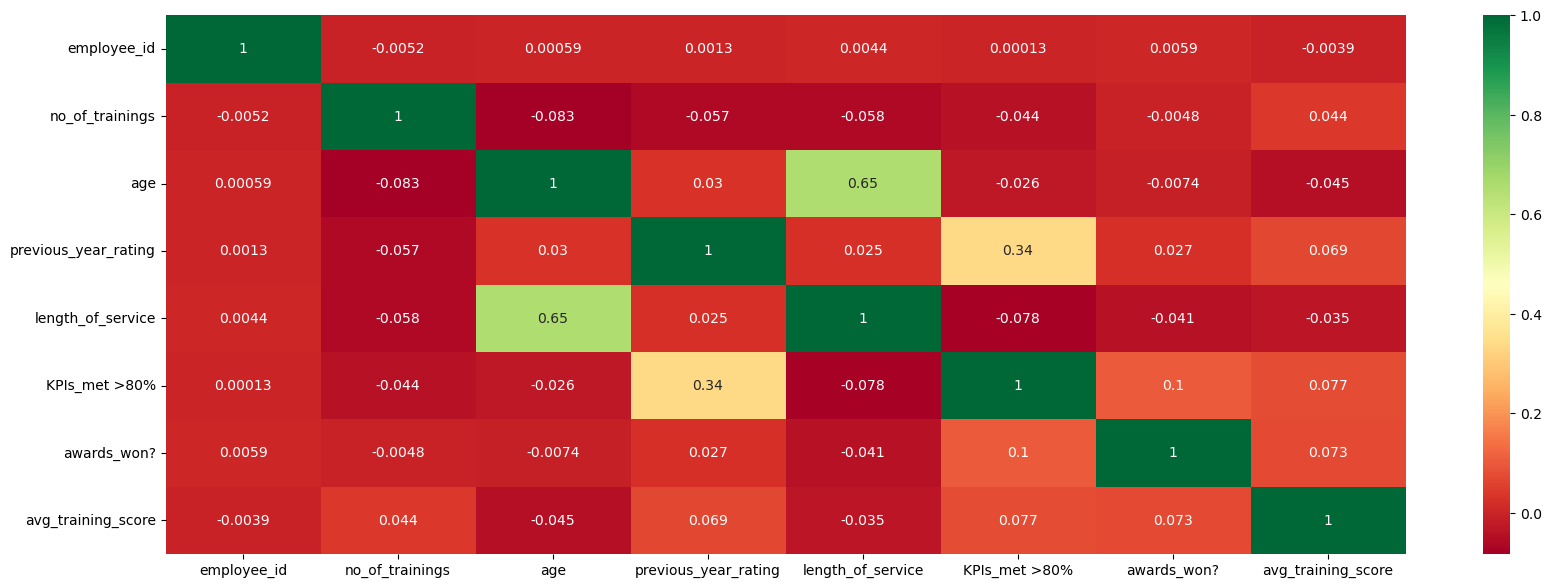

In [112]:
plt.figure(figsize=(20,7))
sns.heatmap(numericcols.corr(), annot=True, cmap='RdYlGn')

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler=StandardScaler()

In [115]:
numericcols_scaled=scaler.fit_transform(numericcols.drop("is_promoted",axis=1))

In [119]:
pd.DataFrame(numericcols_scaled,columns=['employee_id', ' no_of_trainings', 
    'age',                     
    'previous_year_rating',  
    'length_of_service',      
    'KPIs_met >80%',          
   'awards_won?','avg_training_score']).head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,-1.346101,-0.417590,-1.408530,-0.252614,-1.141461,1.350779,-0.153613,1.019932
1,1.560899,-0.417590,-0.495393,-0.252614,-0.199851,-0.740314,-0.153613,-0.922748
2,1.464671,-0.417590,-0.495393,-1.898139,-0.435253,-0.740314,-0.153613,-1.221621
3,-0.025992,2.878593,-0.495393,-1.075377,0.741759,-0.740314,-0.153613,0.123311
4,1.120951,-0.417590,-0.625841,0.570148,0.270954,-0.740314,-0.153613,-0.175563


In [122]:
numericcols_scaled=pd.DataFrame(numericcols_scaled,columns=numericcols.columns[0:8])

In [123]:
numericcols_scaled=numericcols_scaled.reset_index()

In [124]:
objectcols_encode=objectcols_encode.reset_index()

In [125]:
hr_clean=pd.concat([numericcols_scaled,objectcols_encode],axis=1)

In [126]:
numericcols=numericcols.reset_index()

In [127]:
hr_clean["is_promoted"]=numericcols.is_promoted

In [128]:
train_clean=hr_clean[hr_clean.is_promoted!="test"]
test_clean=hr_clean[hr_clean.is_promoted=="test"]

In [129]:
print(train_clean.info())
print(test_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 23490 to 78297
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 54808 non-null  int64  
 1   employee_id           54808 non-null  float64
 2   no_of_trainings       54808 non-null  float64
 3   age                   54808 non-null  float64
 4   previous_year_rating  54808 non-null  float64
 5   length_of_service     54808 non-null  float64
 6   KPIs_met >80%         54808 non-null  float64
 7   awards_won?           54808 non-null  float64
 8   avg_training_score    54808 non-null  float64
 9   index                 54808 non-null  int64  
 10  department            54808 non-null  int32  
 11  region                54808 non-null  int32  
 12  education             54808 non-null  int32  
 13  gender                54808 non-null  int32  
 14  recruitment_channel   54808 non-null  int32  
 15  is_promoted    

# MODEL BUILDING

In [130]:
y=train_clean.is_promoted
X=train_clean.drop(["is_promoted","index","employee_id"],axis=1)

In [131]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 54808 entries, 23490 to 78297
Series name: is_promoted
Non-Null Count  Dtype 
--------------  ----- 
54808 non-null  object
dtypes: object(1)
memory usage: 856.4+ KB


In [132]:
y=y.astype("int64")

In [133]:
y.head()

23490    0
23491    0
23492    0
23493    0
23494    0
Name: is_promoted, dtype: int64

<AxesSubplot: >

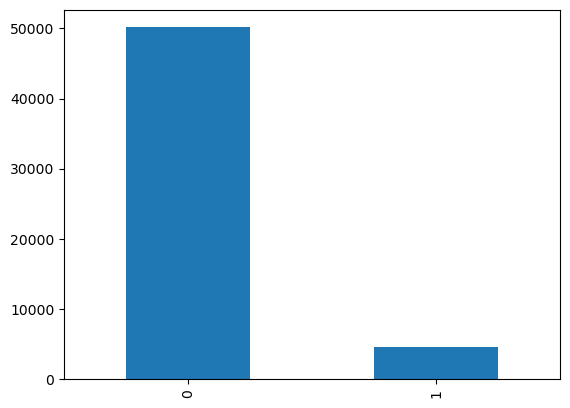

In [134]:
y.value_counts().plot(kind="bar") # IMBALANCE DATA 

In [135]:
from imblearn.over_sampling import SMOTEN

In [136]:
smote = SMOTEN(random_state = 42)
X_smote, y_smote = smote.fit_resample(X,y)

In [137]:
print(y.value_counts())
print(y_smote.value_counts())

0    50140
1     4668
Name: is_promoted, dtype: int64
0    50140
1    50140
Name: is_promoted, dtype: int64


In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
logit=LogisticRegression(max_iter=80)

In [140]:
logitmodel=logit.fit(X_smote,y_smote)

In [141]:
logitmodel.score(X_smote,y_smote)

0.7585759872357399

In [147]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

In [148]:
cross_val_score(logit,X_smote,y_smote)

array([0.72282609, 0.76480854, 0.76017152, 0.7672517 , 0.77074192])

In [149]:
logitpredict=logit.predict(X_smote)

In [150]:
print(classification_report(y_smote,logitpredict))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     50140
           1       0.75      0.77      0.76     50140

    accuracy                           0.76    100280
   macro avg       0.76      0.76      0.76    100280
weighted avg       0.76      0.76      0.76    100280



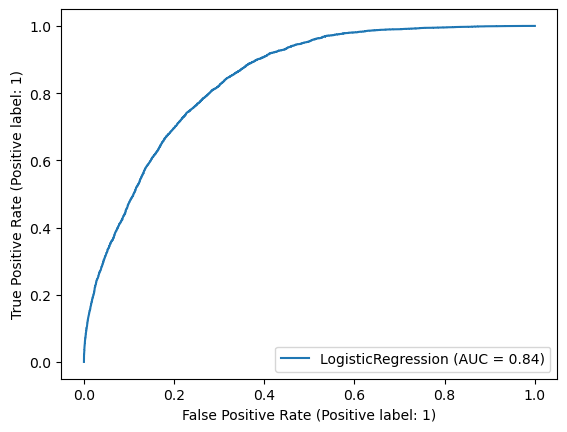

In [151]:
RocCurveDisplay.from_estimator(logit,X_smote,y_smote)

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
tree=DecisionTreeClassifier(max_depth=15)

In [154]:
treemodel=tree.fit(X_smote,y_smote)

In [155]:
treemodel.score(X_smote,y_smote)

0.9274531312325489

In [156]:
cross_val_score(tree,X_smote,y_smote)

array([0.8243917 , 0.91538692, 0.9160351 , 0.91802952, 0.91987435])

In [157]:
treepredict=tree.predict(X_smote)

In [158]:
print(classification_report(y_smote,treepredict))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     50140
           1       0.89      0.97      0.93     50140

    accuracy                           0.93    100280
   macro avg       0.93      0.93      0.93    100280
weighted avg       0.93      0.93      0.93    100280



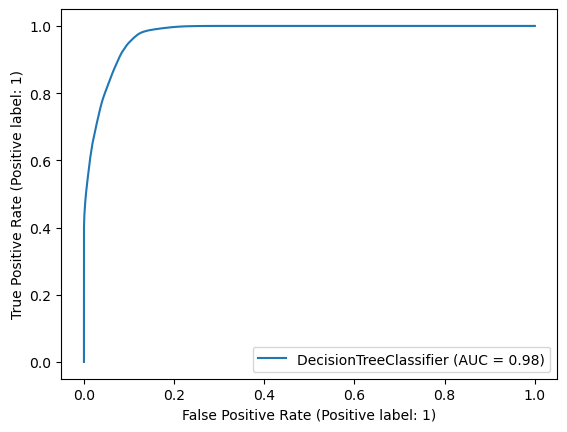

In [159]:
RocCurveDisplay.from_estimator(tree,X_smote,y_smote)

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf=RandomForestClassifier(n_estimators=500,max_depth=10)

In [162]:
rfmodel=rf.fit(X_smote,y_smote)

In [163]:
rfmodel.score(X_smote,y_smote)

0.8703928998803351

In [164]:
cross_val_score(rf,X_smote,y_smote)

array([0.79407659, 0.87295572, 0.87320503, 0.87619665, 0.88023534])

In [165]:
rfpredict=rf.predict(X_smote)

In [166]:
print(classification_report(y_smote,rfpredict))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86     50140
           1       0.83      0.92      0.88     50140

    accuracy                           0.87    100280
   macro avg       0.87      0.87      0.87    100280
weighted avg       0.87      0.87      0.87    100280



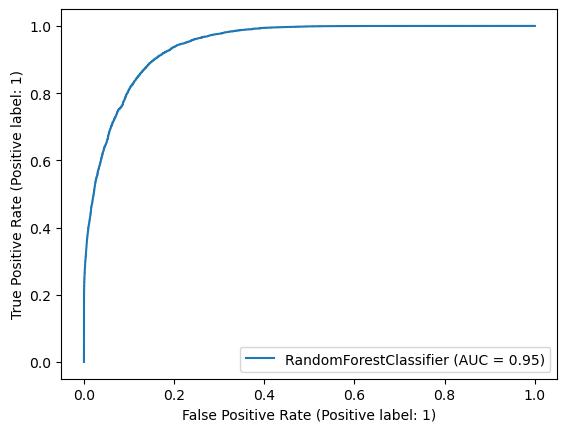

In [167]:
RocCurveDisplay.from_estimator(rf,X_smote,y_smote)